# Projection Matrices and Least Squares

<https://www.youtube.com/watch?v=osh80YCg_GM>

## recap the two components in projection

knowing that I can compute $P$ as:

$P = A (A^{T} A)^{-1} A^{T}$

$b$ is a vector,

if $b \ \text{in} \ C(A)$, then $p_{b} = b$, 

proof: 

let $b$ be
$A x$, then plug $A x$ to the projection formula: 
$A (A^{T} A)^{-1} A^{T} A x = A x$

if $b \perp C(A)$, then $p_{b} = 0$, 

proof: 

plug $b$ in the projection formula and get
$A (A^{T} A)^{-1} A^{T} b$, while $A^{T} b = Z$ 
(in other words, $b$ is in $N(A^{T})$)



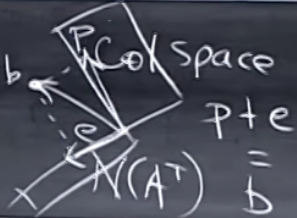

### the geometry of the two components

vector $b$ has a couple of projection on to $C(A)$ and $N(A^{T})$,
which are $p, e$ respectively, and $b = p + e$

$e = (I - P) b$, $I - P$ is the projection matrix on to the 
perp space to $C(A)$

$(I - P)$ and $P$ share the same matrix properties: such as 
being symmetrical or not etc.

## find the best straight line

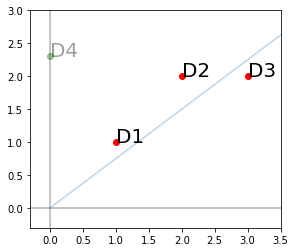

In [5]:
import pylinearalgebra.vistools as vist

xy = vist.XY(x_lim=(-0.3, 3.5), y_lim=(-0.3, 3))
xy.line((0, 0), (40, 30), alpha=0.3)
xy.point((1, 1, 'D1'), color='r')
xy.point((2, 2, 'D2'), color='r')
xy.point((3, 2, 'D3'), color='r')
xy.point((0, 2.3, 'D4'), color='g', alpha=0.38, text_alpha=0.38)

**a formal definition of "best" in terms of the error vector:**

find the minimum of $ \sum\limits_{i=1}^{k} {e_{i}^{2}} $ for the given line and $k$ points in $R^{2}$, **hence the notion
"the least squares"**

$|e| = |A x - b|$, the length of the error vector

in statistics, this is **linear regression**


### beware of outlier 

$D4$ is an outlier - the "best line" that accounts for ${D1, D2, \dots , D4}$ is drastically different to the best solution without.

in this case, "least squares" (which over-compensate for
the outliers) may not be the best method

(but it is a most used method)

### finding p using the projection formula

to find $\hat{x} \ \text{in} \ \hat{x} = \begin{bmatrix}\hat{C} \\ \hat{D}\end{bmatrix}$,

$A^{T}A \hat{x} = A^{T}b, \ \text{knowing that} \ 
b = \begin{bmatrix}1 \\ 2 \\ 2\end{bmatrix}$, 

Gilbert called it the most important equation in statistics (
fitting or de-noise)

plug $A, b$ into this equation:

$
3C + 6D = 5\\
6C + 14D = 11
$

this is the **normal equation**




### finding p using calculus 

which is to minimize $ \sum\limits_{i=1}^{k} {e_{i}^{2}} $

$e_{i}$ can be found by plugging $D1, D2, D3$ into the original 
equation

$
\begin{bmatrix}1 & 1\\
1 & 2\\
1 & 3
\end{bmatrix} \begin{bmatrix}C \\ D\end{bmatrix} = 
\begin{bmatrix}1 \\ 2 \\ 3\end{bmatrix}
\\
e = Ax - b
$



$
(C + D - 1)^{2} + (C + 2D - 2)^{2} + (C + 3D - 3)^{2}
$

**as this is an equation of two variables, I can take the partial
derivative with the respect of $C, D$ being zero**

```
3C + 6D = 5 -- with the respect of C being zero
6C + 14D = 11 -- with the respect of D begin zero
```


### the two pictures of the least squares

using the above $R^{2}$ example

- `{C, D}` corresponds to the closest line picture 
- p, the result of plugging `{C, D}` to $A\hat{x}$ corresponds to the
subspace picture

### the invertibility of $A^{T} A$

**if $A$ has indep cols then $A^{T} A$ is invertible.**




to proof:

suppose $A^{T} A x = 0$, show that $x$ must be the zero vector
(its nullspace only consists of the zero vector)

I get transform both sides of the equation to

$x^{T} A^{T} A x = 0\\
(x^{T} A^{T}) A x = 0 \\
(A x)^{T} (A x) = 0 \\
\\
|A x|^{2} = 0$

there $Ax = 0$ must be true, and $A$ has indep cols

therefore $x = 0$ must be true

### orthonormal vectors

 "when the shape of the vectors are even better"
 
in the above $R^{2}$ case the col vectors happen to be independent,
but there are cases **when the col vectors are definitely indep -
when they are orthogonal**

and **if they are of unit-length, they are the orthonormal vectors**

an example is the xyz axes in $R^{3}$ and there are infinitely
many such vectors



# Recitation and Exercises

<https://www.youtube.com/watch?v=AmQcoopBUTk>

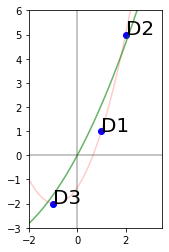

In [73]:
# find the quadratic equation through the origin that
# is a best fit for the points
# (1, 1), (2, 5), (-1, -2)

import pylinearalgebra.vistools as vist
import numpy as np

xy = vist.XY(x_lim=(-2, 3.5), y_lim=(-3, 6))
xy.point((1, 1, 'D1'), color='b')
xy.point((2, 5, 'D2'), color='b')
xy.point((-1, -2, 'D3'), color='b')

# my incorrect answer, without zeroing the constant term 
# note the parabola does not go through the origin
xy.fx(np.arange(-4, 4, 0.1), 
      lambda x: 5/6 * x * x + 3/2 * x - 4/3, color='r', alpha=0.2)

xy.fx(np.arange(-4, 4, 0.1), 
      lambda x: 41/22 * x + 5/22 * x * x, color='g', alpha=0.6)


In [72]:
# official:

# think about what the first step is:
# find the equation.
# note that the question already stated the parabola went through
# the origin, meaning I should ignore the constant term completely!
# this is not trivial as the result will be completely different!

# (IMPROTANT: the order of C and D matters!!! use Sigma(e^2)
#  to verify - see my notes for Problem 16.1)
# C t + D t^2 = b

# next, need to set a matrix equation


# -----------------------------------------------------------------


# a x^2 + b x + c = y
# plug in (1, 1), (2, 5), (-1, -2)
# a  +  b + c = 1
# 4a + 2b + c = 5
# a  -  b + c = -2

# therefore, A, b (as in Ax = b) are:

import sympy

# this is incorrect: the constant term must be zero

# A = sympy.Matrix([
#     [1, 1, 1],
#     [4, 2, 1],
#     [1, -1, 1]
# ])

A = sympy.Matrix([
    [1,  1],
    [2,  4],
    [-1, 1]
])
b = sympy.Matrix([1, 5, -2])

# cheating:
A.pinv_solve(b)

# plug the result back to the lambda, check whether the parabola
# goes through these 3 points.

Matrix([
[41/22],
[ 5/22]])

In [46]:
# doing it manually
# to solve:
# AT A xh = AT b

import pylinearalgebra.mattools as mt

ATA = A.transpose() * A
ATb = A.transpose() * b

mt.pprint(ATA, end='\n')
mt.pprint(ATb, end='\n')

# therefore, to find x-hat, I need to solve:
# ⎡ 18   8   6 ⎤
# ⎢  8   6   2 ⎥ x = [19 13 4]T
# ⎣  6   2   3 ⎦

# create the augmented matrix, then use elimination

ATAATb = sympy.Matrix([
    l + r for l, r in zip(ATA.tolist(), ATb.tolist())
])
R, _ = ATAATb.rref()
R

⎡ 18   8   0 ⎤
⎢  8   6   0 ⎥
⎣  0   0   0 ⎦


⎡ 19⎤
⎢ 13⎥
⎣  0⎦




Matrix([
[1, 0, 0,  5/22],
[0, 1, 0, 41/22],
[0, 0, 0,     0]])

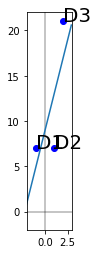

In [64]:
# Problem 16.1
# write down 3 equations for the line
# b = C + Dt to go through 
# b = 7 at t = -1,
# b = 7 at t = 1,
# b = 21 at t = 2

# find the least squares solution xh = (C, D) and draw the 
# closest line

import pylinearalgebra.vistools as vist
import numpy as np

xy = vist.XY(x_lim=(-2, 3), y_lim=(-2, 22))
xy.point((-1, 7, 'D1'), color='b')
xy.point((1, 7, 'D2'), color='b')
xy.point((2, 21, 'D3'), color='b')
xy.fx(np.arange(-3, 3, 0.1), lambda x: 9 + 4 * x)

In [60]:
import sympy
A = sympy.Matrix([
    [1, -1],
    [1,  1],
    [1,  2]
])
b = sympy.Matrix([7, 7, 21])

A.solve_least_squares(b)

Matrix([
[9],
[4]])

In [70]:
# sanity check: sum(ei) is minimized for {C, D} = 
# lambda x: 9 + 4 * x

# (what about lambda x: 4 + 9 * x ???)
# using sigma(e^2), I can see reverting the position of C, D
# will give incorrect answer!

line = lambda x: 9 + 4 * x
line_incorrect = lambda x: 4 + 9 * x
for l in (line, line_incorrect):
    e_squares_1 = [(l(t) - b) ** 2 for (t, b) in [[-1, 7], [1, 7], [2, 21]]]
    print(sum(e_squares_1))

56
181


In [ ]:
# Problem 16.2

# find the project p = A xh in the previous problem
# this gives the 3 heights of the closest line,
# show that the error vector is e = {2, -6, 4}


# why is P . e = 0 ?

# proof for P . e = 0

# e \perp C(A), therefore its projection onto A is zero

# official:
# knowing e = b - p
# mult both side by P
# P e = P (b - p)
# P e = P b - P p
# P e = p - p = 0 
# (because projected twice == projected once)


In [74]:
# Problem 16.3
# suppose the measurements at 
# t = -1, 1, 2 are the errors 2, -6, 4 in the previous problem
# compute xh and the closest line to these new measurements

# explain the answer: b = (2, -6, 4) is \perp to ??? so
# the projection is p = 0

# official: if b is the error vector e, then b is perp to 
# the column space of A, therefore projection p is 0
# (using the proof above in 16.2)

In [ ]:
# Problem 16.4

# suppose the measurements at t = {-1, 1, 2} are
# b = {5, 13, 17}
# compute x-hat and the closest line and e

# the error is e = 0, because b is ??? 

# b is in the col space

In [ ]:
# Problem 16.5

# which of the 4 subspaces contains the error vector e?

# which contains p?

# which contains x-hat?

# what is the nullspace of A

# e: N(AT), left nullspace
# p: C(A), col space
# x-hat: row space
# N(A): consists only of {0}, because rank of A is 2, n = 2
#       dimN(A) = n - rank = 0

# A = sympy.Matrix([
#     [1, -1],
#     [1,  1],
#     [1,  2]
# ])


⎡  1⎤
⎣ -1⎦
⎡    -1⎤
⎢    -1⎥
⎢ 29/12⎥
⎢     0⎥
⎣ -5/12⎦


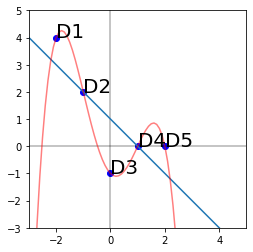

In [93]:
# Problem 16.6
# find the best line C + D t 
# to fit b = 4, 2, -1, 0, 0 at times t = -2, -1, 0, 1, 2

import pylinearalgebra.vistools as vist
import pylinearalgebra.mattools as mt
import numpy as np
import sympy

xy = vist.XY(x_lim=(-3, 5), y_lim=(-3, 5))
xy.point((-2, 4, 'D1'), color='b')
xy.point((-1, 2, 'D2'), color='b')
xy.point((0, -1, 'D3'), color='b')
xy.point((1,  0, 'D4'), color='b')
xy.point((2,  0, 'D5'), color='b')

A = sympy.Matrix([
    [1, -2],
    [1, -1],
    [1, 0],
    [1, 1],
    [1, 2]
])
b = sympy.Matrix([4, 2, -1, 0, 0])

mt.pprint(A.solve_least_squares(b))
# {C, D} = {1, -1}
# C + D t becomes 1 - 1 t
xy.fx(np.arange(-3, 5, 0.1), lambda x: 1 - x)

# -------------
# what about a cubic curve?

# C + D t + E t^2 + F t^3 + G t^4
A_ = sympy.Matrix([
    [1, -2, 4, -8, 16],
    [1, -1, 1, -1, 1],
    [1,  0, 0,  0, 0],
    [1,  1, 1,  1, 1],
    [1,  2, 4,  8, 16],
])
mt.pprint(A_.solve_least_squares(b))
xy.fx(np.arange(-3, 5, 0.1), 
      lambda x: -1 - x + 29/12 * x * x + 0 - 5/12 * x * x * x * x, 
      color='r', alpha=0.5)